✅ Image loaded successfully.


Enter secret message:  Hello how are you
Enter a passcode:  1234


✅ Message encoded and image saved as 'encryptedImage.jpg'


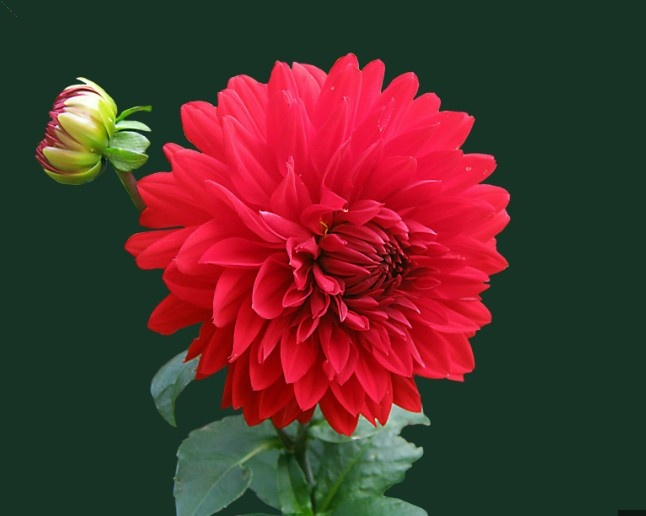

Enter passcode for decryption:  1234


🔓 Decrypted message: Hello how are you


In [1]:
import cv2
import os
from IPython.display import Image, display

# Check if image exists
image_path = "flower.jpg"
if not os.path.exists(image_path):
    print(f"❌ Error: '{image_path}' not found in folder: {os.getcwd()}")
else:
    # Load image
    img = cv2.imread(image_path)
    print("✅ Image loaded successfully.")

    # Input message and password
    msg = input("Enter secret message: ")
    password = input("Enter a passcode: ")

    # Maps
    d = {chr(i): i for i in range(255)}
    c = {i: chr(i) for i in range(255)}

    # Dimensions check
    max_pixels = img.shape[0] * img.shape[1]
    if len(msg) > max_pixels:
        print("❌ Message too long for this image. Use a larger image or shorter message.")
    else:
        # Encode message
        n, m, z = 0, 0, 0
        for i in range(len(msg)):
            img[n, m, z] = d[msg[i]]
            n += 1
            m += 1
            z = (z + 1) % 3

        # Save encoded image
        encoded_image_path = "encryptedImage.jpg"
        cv2.imwrite(encoded_image_path, img)
        print(f"✅ Message encoded and image saved as '{encoded_image_path}'")

        # Display image in Jupyter
        display(Image(filename=encoded_image_path))

        # Decryption
        message = ""
        n, m, z = 0, 0, 0
        pas = input("Enter passcode for decryption: ")

        if pas == password:
            for i in range(len(msg)):
                message += c[img[n, m, z]]
                n += 1
                m += 1
                z = (z + 1) % 3
            print("🔓 Decrypted message:", message)
        else:
            print("🚫 You are not authenticated.")
